Download kaggle data in Google Colab : 

Link : https://www.kaggle.com/mkechinov/ecommerce-behavior-data-from-multi-category-store/version/8

In [ ]:
 ! pip install -q kaggle

In [ ]:
from google.colab import files
# Choose the kaggle.json file that you downloaded
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kareemdesouky","key":"165e4bc1f98904dab3bf653f7ca401fc"}'}

In [ ]:
#  Make directory named kaggle and copy kaggle.json file there.
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
# Change the permissions of the file.
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
 ! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-12-12 11:59:54          18607  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01          11276  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           5792  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-10-22 10:48:21           3972  
nickuzmenkov/nih-chest-xrays-tfrecords                      NIH Chest X-rays

In [ ]:
! kaggle datasets download mkechinov/ecommerce-behavior-data-from-multi-category-store

100% 4.28G/4.29G [01:24<00:00, 34.3MB/s]
100% 4.29G/4.29G [01:25<00:00, 54.2MB/s]


In [ ]:
! unzip /content/ecommerce-behavior-data-from-multi-category-store.zip

Archive:  /content/ecommerce-behavior-data-from-multi-category-store.zip
  inflating: 2019-Nov.csv            
  inflating: 2019-Oct.csv            


Read datasets :

In [ ]:
!pip install squarify

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import squarify
from datetime import datetime
import plotly.express as px

%matplotlib inline

#Business Understanding
Understanding what are the key drivers of customers’ buying behavior is always the holy grail for the eCommerce industry. The knowledge can be used to improve the shopping process and eventually result in higher sales and customer satisfaction.

we will focuc on three quesions below:

Question 1: Daily traffic in October 2019 ?

Question 2: What product categories and brands are the most popular?

Question 3: Will the customer purchases the products while adding them to the shopping cart?

In [ ]:
data_oct = pd.read_csv('2019-Oct.csv')

In [ ]:
# data_nov = pd.read_csv('2019-Nov.csv')

In [ ]:
# sample_size = 100000
# set.seed(1)
# idxs = sample(1:nrow(data_oct),sample_size,replace=F)
# subsample = data_oct[idxs,]
# pvalues = list()
# for (col in names(data_oct)) {
#   if (class(data_oct[,col]) %in% c("numeric","integer")) {
#     # Numeric variable. Using Kolmogorov-Smirnov test
    
#     pvalues[[col]] = ks.test(subsample[[col]],data_oct[[col]])$p.value
    
#   } else {
#     # Categorical variable. Using Pearson's Chi-square test
    
#     probs = table(data_oct[[col]])/nrow(data_oct)
#     pvalues[[col]] = chisq.test(table(subsample[[col]]),p=probs)$p.value
    
#   }
# }

# pvalues

In [ ]:
# subsample = data_oct.groupby(['event_type','brand'], as_index=False) \
#        .apply(lambda x: x.sample(n=1)) \
#        .reset_index(drop=True)

In [ ]:
data_oct.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c,2019-10-01
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc,2019-10-01
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8,2019-10-01
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713,2019-10-01
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d,2019-10-01


In [ ]:
data_oct.product_id.value_counts().sum()

42448764

In [ ]:
data_oct.brand.value_counts().sum()

36331684

In [ ]:
data_oct.brand.value_counts()

samsung    5282775
apple      4122554
xiaomi     3083763
huawei     1111205
lucente     655861
            ...   
dormeo           1
della            1
kajsa            1
aufine           1
nicalis          1
Name: brand, Length: 3444, dtype: int64

In [ ]:
data_oct.loc[data_oct['product_id'] == 1004237].value_counts()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d,2019-10-01
161,2019-10-01 00:02:14 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,514218020,d7c4761f-de75-454b-9164-177db5e53695,2019-10-01
1873,2019-10-01 02:20:24 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,512610413,1e103ce6-fa4e-4a46-9e1c-f472fcb5f10a,2019-10-01
1918,2019-10-01 02:20:35 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,513733456,16d54a72-0afc-4fb2-aac3-e6c2dbf591be,2019-10-01
2059,2019-10-01 02:21:00 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,555462104,3f61b85a-06c8-449b-a6be-3ad328bfa732,2019-10-01
...,...,...,...,...,...,...,...,...,...,...
42445122,2019-10-31 23:29:57 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1091.33,513534639,1f684ff6-83f7-4051-8ff0-f4c94c72b78d,2019-10-31
42446069,2019-10-31 23:38:08 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1091.33,519277091,9566d088-ab83-4b5c-b69a-f279f0f15530,2019-10-31
42446300,2019-10-31 23:40:07 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1091.33,513606095,d8777993-653d-4b9d-bc1f-7795a50dcc5e,2019-10-31
42447610,2019-10-31 23:50:53 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1091.33,518538389,ccb1aadc-9704-4f9b-8eb1-03150086a4da,2019-10-31


In [ ]:
data_oct.loc[data_oct['brand'] == "apple"].value_counts()

NameError: ignored

In [ ]:
data_oct.shape

(42448764, 9)

In [ ]:
data_oct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42448764 entries, 0 to 42448763
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 2.8+ GB


In [ ]:
data_oct.columns

Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'],
      dtype='object')

How many customers visit the site?

In [ ]:
visitor = data_oct['user_id'].nunique()
print ("visitors: {}".format(visitor))

visitors: 3022290


Does traffic flunctuate by date?

In [ ]:
def convert_time_to_date(utc_timestamp):    
    '''covert utc timestamp string to date yyyy-mm-dd format in datetime object
    
    Parameters: 
        utc_timestamp (str): utc timestamp string is to be converted.
    
    Returns:
        utc_date (datetime): datetime object for date in format yyyy-mm-dd
    '''
    
    utc_date = datetime.strptime(utc_timestamp[0:10], '%Y-%m-%d').date()
    return utc_date 

In [ ]:
convert_time_to_date("2019-10-01 00:00:00")

datetime.date(2019, 10, 1)

In [ ]:
# Due to the amount of data, datetime conversion takes a while....
data_oct['event_date'] = data_oct['event_time'].apply(lambda s: convert_time_to_date(s))
visitor_by_date = data_oct[['event_date','user_id']].drop_duplicates().groupby(['event_date'])['user_id'].agg(['count']).sort_values(by=['event_date'], ascending=True)

In [ ]:
fig = px.line( x= x, y=y , title='Vistors Daily Trend')
fig.show()

choose the product

In [ ]:
# Enter product_id
product_id = int(input ('please write the product id you need : ') )
data_oct[data_oct['product_id'] == product_id][['category_code','brand']].head(1)

please write the product id you need : 1004237


,category_code,brand
4,electronics.smartphone,apple


In [ ]:
product_daily_price = data_oct.loc[data_oct['product_id'] == product_id,['event_date','price']].groupby(['event_date']).mean()
product_daily_price = data_oct[['event_date','price']].groupby(['event_date']).mean()

In [ ]:
x = pd.Series(product_daily_price.index.values)
y = product_daily_price['price']

In [ ]:
fig = px.line( x= x, y=y , title='Price Daily Trend')
fig.show()

Which category customers interact the most? What brand the view to most

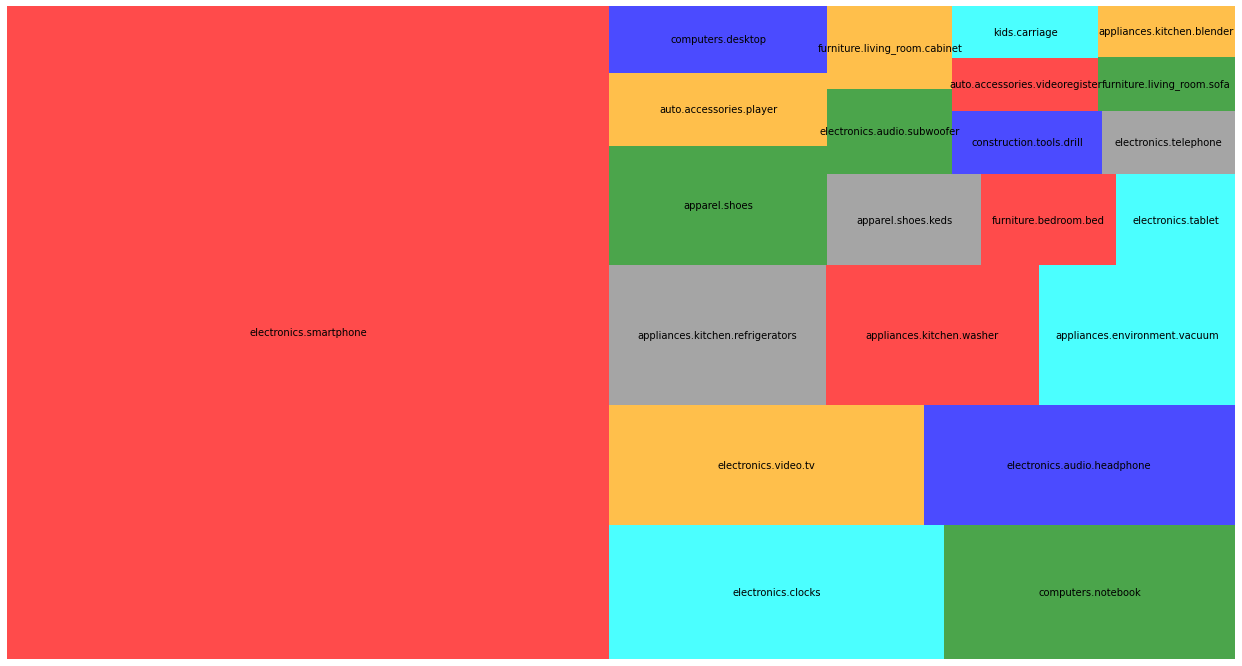

In [ ]:
top_category_n = 22
top_category = data_oct['category_code'].value_counts()[:top_category_n].sort_values(ascending=False)
df = pd.DataFrame({'count':top_category, 'top_category':top_category })

#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(22, 12)

squarify.plot(sizes=top_category, label=top_category.index.array, color=["red","cyan","green","orange","blue","grey"], alpha=.7  )
plt.axis('off')
plt.show()

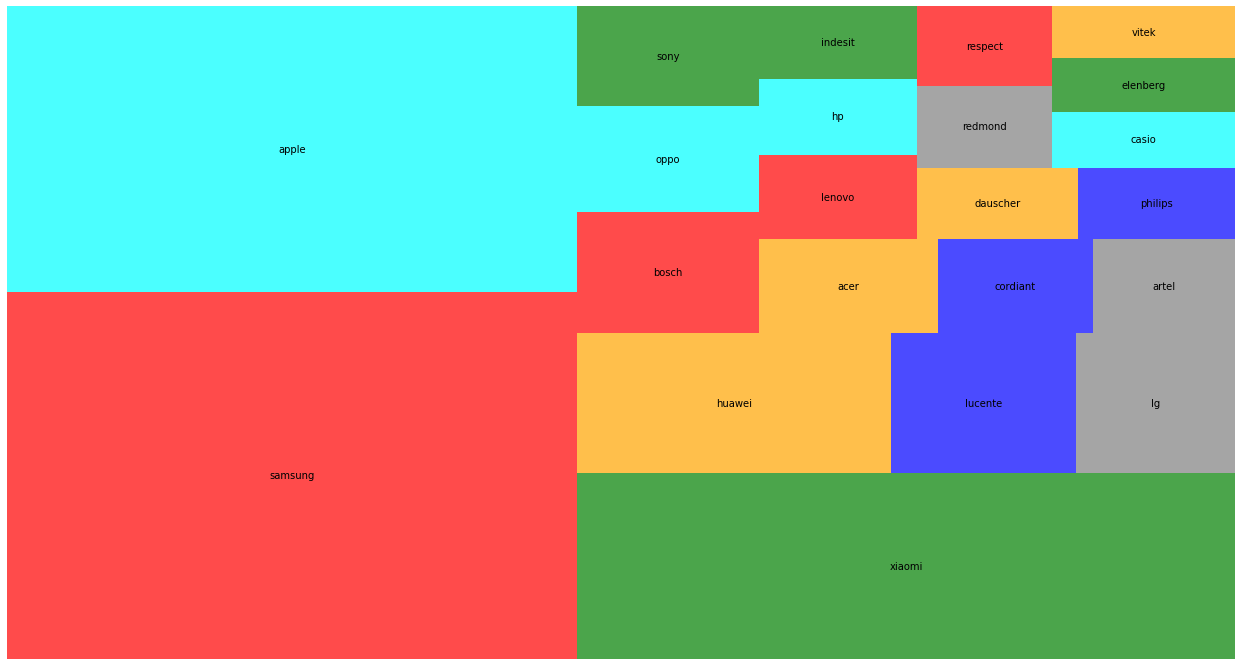

In [ ]:
top_brand_n = 22
top_brand = data_oct['brand'].value_counts()[:top_brand_n].sort_values(ascending=False)
df = pd.DataFrame({'count':top_brand, 'top_category':top_brand.index.array })

#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(22, 12)

squarify.plot(sizes=top_brand, label=top_brand.index.array, color=["red","cyan","green","orange","blue","grey"], alpha=.7  )
plt.axis('off')
plt.show()

#Purchase Behavior
What's the distribution of eventype?

In [ ]:
data_oct['event_type'].value_counts()

view        40779399
cart          926516
purchase      742849
Name: event_type, dtype: int64

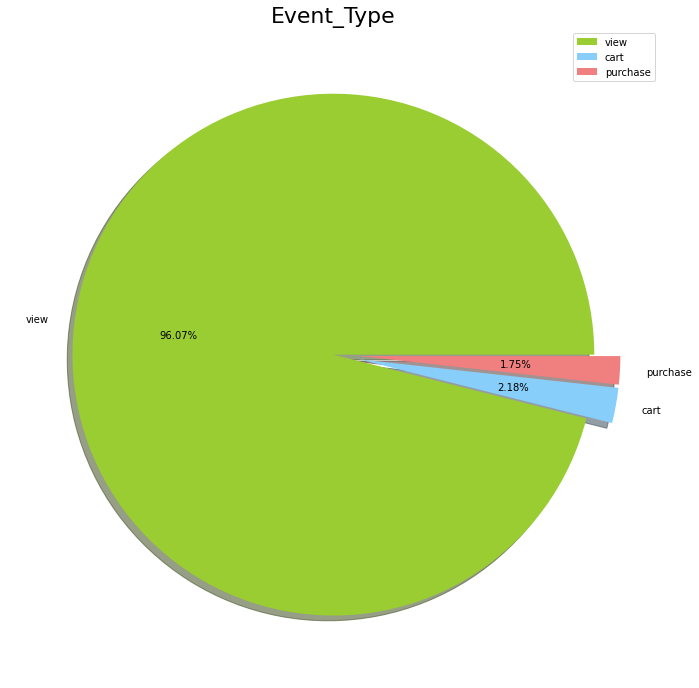

In [ ]:
labels = ['view', 'cart','purchase']
size = data_oct['event_type'].value_counts()
colors = ['yellowgreen', 'lightskyblue','lightcoral']
explode = [0, 0.1,0.1]

plt.rcParams['figure.figsize'] = (12, 12)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Event_Type', fontsize = 22)
plt.axis('off')
plt.legend()
plt.show()

In [ ]:
fig = px.pie(size, values=size, names=labels, title='Purchase Behavior')
fig.show()

what item do customers buy?

In [ ]:
purchase = data_oct.loc[data_oct['event_type'] == 'purchase']
purchase = purchase.dropna(axis='rows')
purchase

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date
162,2019-10-01 00:02:14 UTC,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564,2019-10-01
308,2019-10-01 00:04:37 UTC,purchase,1002532,2053013555631882655,electronics.smartphone,apple,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68,2019-10-01
442,2019-10-01 00:07:07 UTC,purchase,13800054,2053013557418656265,furniture.bathroom.toilet,santeri,54.42,555332717,1dea3ee2-2ded-42e8-8e7a-4e2ad6ae942f,2019-10-01
574,2019-10-01 00:09:26 UTC,purchase,4804055,2053013554658804075,electronics.audio.headphone,apple,189.91,524601178,2af9b570-0942-4dcd-8f25-4d84fba82553,2019-10-01
603,2019-10-01 00:09:54 UTC,purchase,4804056,2053013554658804075,electronics.audio.headphone,apple,161.98,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68,2019-10-01
...,...,...,...,...,...,...,...,...,...,...
42447959,2019-10-31 23:53:53 UTC,purchase,1004767,2053013555631882655,electronics.smartphone,samsung,242.63,542774966,957dc70c-31d3-42b7-aef0-2d2827c35251,2019-10-31
42448173,2019-10-31 23:55:21 UTC,purchase,47500017,2110937143172923797,construction.tools.light,puckator,20.59,514622109,5724116e-365b-4ac1-9d03-b8d66e1ccc7c,2019-10-31
42448271,2019-10-31 23:56:03 UTC,purchase,1003306,2053013555631882655,electronics.smartphone,apple,577.89,512717356,f35ac37c-9573-4e30-b3d9-c09bb0b95a2b,2019-10-31
42448362,2019-10-31 23:56:53 UTC,purchase,1004240,2053013555631882655,electronics.smartphone,apple,1054.60,533892594,3a5a3b01-2ab1-4a1d-a202-30d336e0057b,2019-10-31


What brands the customers buy?

In [ ]:
top_sellers = purchase.groupby('brand')['brand'].agg(['count']).sort_values('count', ascending=False)
top_sellers.head(20)

,count
brand,
samsung,171706
apple,142577
xiaomi,46595
huawei,23294
oppo,10891
lg,7831
acer,6882
elenberg,5435
indesit,5023


User Journey example, is it like typical funnel: view => cart => purchase ?

In [ ]:
user_id = 560744406
data_oct.loc[data_oct['user_id'] == user_id]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date
20837599,2019-10-16 07:35:48 UTC,view,1004788,2053013555631882655,electronics.smartphone,xiaomi,138.44,560744406,d9f81eb6-e420-47cd-bb07-3cf17f336432,2019-10-16
20839249,2019-10-16 07:36:56 UTC,view,1005031,2053013555631882655,electronics.smartphone,xiaomi,195.37,560744406,d9f81eb6-e420-47cd-bb07-3cf17f336432,2019-10-16
20842419,2019-10-16 07:39:14 UTC,view,1005031,2053013555631882655,electronics.smartphone,xiaomi,195.37,560744406,d9f81eb6-e420-47cd-bb07-3cf17f336432,2019-10-16
20847313,2019-10-16 07:42:40 UTC,view,1005031,2053013555631882655,electronics.smartphone,xiaomi,195.37,560744406,d9f81eb6-e420-47cd-bb07-3cf17f336432,2019-10-16
20854738,2019-10-16 07:47:55 UTC,view,1005031,2053013555631882655,electronics.smartphone,xiaomi,195.37,560744406,d9f81eb6-e420-47cd-bb07-3cf17f336432,2019-10-16
21759034,2019-10-16 17:34:16 UTC,view,1005031,2053013555631882655,electronics.smartphone,xiaomi,190.22,560744406,78db6446-7619-4643-b1aa-7ecaef6b622f,2019-10-16
21988065,2019-10-17 02:04:46 UTC,view,1005006,2053013555631882655,electronics.smartphone,xiaomi,87.78,560744406,078a86fa-4686-4826-bc37-68d274742432,2019-10-17
21988330,2019-10-17 02:05:21 UTC,view,1005031,2053013555631882655,electronics.smartphone,xiaomi,190.22,560744406,078a86fa-4686-4826-bc37-68d274742432,2019-10-17
22116527,2019-10-17 04:38:56 UTC,view,1005031,2053013555631882655,electronics.smartphone,xiaomi,189.97,560744406,a2aba3be-9554-4eb8-9288-892753ed930c,2019-10-17
22562431,2019-10-17 10:29:40 UTC,view,1005031,2053013555631882655,electronics.smartphone,xiaomi,189.89,560744406,0ceb20b6-ab07-4cb3-8657-f2d442368847,2019-10-17
